# Python and NetCDF climate data
Unlike MatLab, Python does not have native support for multidimensional NetCDF datasets. Instead, we have to import a few specific packages into our script and do a few extra steps to manipulate the data. The notebook below demonstrates the steps needed to import, link variables representing the different dimensions, and run simple analyses on netCDF data.  

In the example here, we'll use daily precipitation predictions downscaled to a 1/16-degree resolution spanning the years 1990 to 2005. Thus, our data has 4 dimensions: `latitude`, `longitude`, `time`, and `precipitation`. *(Actually, the dataset has a 5th "dimension" as well, but this only includes data on the geographic coordinate reference system and has only one value, so we'll ignore it)*. 

## Importing the netCDF file into our Python script
Here we read our dataset into a netCDF4 object. In doing so, we can access it programmatically.

http://unidata.github.io/netcdf4-python/

In [19]:
#Import package to read netCDF file
import netCDF4

In [20]:
#Read the file into a netCDF dataset object
fileName = 'macav2livneh_pr_bcc-csm1-1_r1i1p1_historical_1990_2005_CONUS_monthly.nc'
dataset = netCDF4.Dataset(fileName)

## Exploring out netCDF dataset

#### Dimensions
Our dataset has 4 dimensions: 
* `lat` with 444 values
* `lon` with 922 values
* `time` with 192 values, and 
* a coordinate reference system (`crs`) with one value

In [3]:
#Display the dimensions of the dataset
dataset.dimensions

OrderedDict([('lat', <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 444
), ('lon', <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 922
), ('time', <class 'netCDF4._netCDF4.Dimension'>: name = 'time', size = 192
), ('crs', <class 'netCDF4._netCDF4.Dimension'>: name = 'crs', size = 1
)])


#### Variables
Our dataset has 5 variables:
* `lat`
* `lon`
* `time`
* `precipitation`
* `crs`

In [25]:
#Show the 'key' or names of the variables
dataset.variables.keys()

odict_keys(['lat', 'lon', 'time', 'precipitation', 'crs'])

In [30]:
#Show attributes of the precipitation variable
dataset.variables['precipitation']

<class 'netCDF4._netCDF4.Variable'>
float32 precipitation(time, lat, lon)
    _FillValue: -9999.0
    long_name: Monthly Precipitation Amount
    units: mm
    grid_mapping: crs
    standard_name: precipitation
    cell_methods: time: sum(interval: 24 hours): sum over days
    coordinates: time lon lat
    comments: Total monthly precipitation at surface: includes both liquid and solid phases from all types of clouds (both large-scale and convective)
unlimited dimensions: 
current shape = (192, 444, 922)
filling on

#### Attributes

In [38]:
for attr in dataset.ncattrs():
    print(attr)

description
id
naming_authority
Metadata_Conventions
Metadata_Link
cdm_data_type
title
summary
keywords
keywords_vocabulary
standard_name_vocabulary
comment
license
geospatial_bounds
geospatial_lat_min
geospatial_lat_max
geospatial_lon_min
geospatial_lon_max
geospatial_lat_units
geospatial_lon_units
geospatial_lat_resolution
geospatial_lon_resolution
geospatial_vertical_min
geospatial_vertical_max
geospatial_vertical_resolution
geospatial_vertical_positive
time_coverage_start
time_coverage_end
time_coverage_duration
time_coverage_resolution
date_created
date_issued
creator_name
creator_url
creator_email
institution
processing_level
project
contributor_name
contributor_role
publisher_name
publisher_email
publisher_url
NCO
history
date_modified
coordinate_system


In [47]:
#Show the value for the 'summary' attribute
print(getattr(dataset,'summary'))

This archive contains downscaled meteorological and hydrological projections for the Conterminous United States at 1/16-deg resolution utilizing the Multivariate Adaptive Constructed Analogs (MACA, Abatzoglou, 2012) statistical downscaling method with the Livneh et al (2013) training dataset. The downscaled meteorological variables are maximum/minimum temperature(tasmax/tasmin), precipitation amount(pr), downward shortwave solar radiation(rsds), wind speed(was), and specific humidity(huss). The downscaling is based on the 365-day model outputs from different global climate models (GCMs) from Phase 5 of the Coupled Model Inter-comparison Project (CMIP3) utlizing the historical (1950-2005) and future RCP4.5/8.5(2006-2099) scenarios. Leap days have been added to the dataset from the average values between Feb 28 and Mar 1 in order to aid modellers.


## Working with the data

In [165]:
#Read the variables in NETCDF file
lon = dataset.variables['lon']
lat = dataset.variables['lat']
time = dataset.variables['time']
precip = dataset.variables['precipitation']

In [5]:
#Display info about a variable
print(precip)

<class 'netCDF4._netCDF4.Variable'>
float32 precipitation(time, lat, lon)
    _FillValue: -9999.0
    long_name: Monthly Precipitation Amount
    units: mm
    grid_mapping: crs
    standard_name: precipitation
    cell_methods: time: sum(interval: 24 hours): sum over days
    coordinates: time lon lat
    comments: Total monthly precipitation at surface: includes both liquid and solid phases from all types of clouds (both large-scale and convective)
unlimited dimensions: 
current shape = (192, 444, 922)
filling on


In [176]:
lonMask = 235 < arrLon #and arrLon < 240
latMask = 25 < arrLat #and arrLat < 30
timeMask = np.datetime64('1999-01-01') < arrTime #and (arrTime < np.datetime64('1999-05-01'))

In [185]:
timeAvg = precip[timeMask,:,:].mean(axis=0)

ValueError: x and y must be the same size

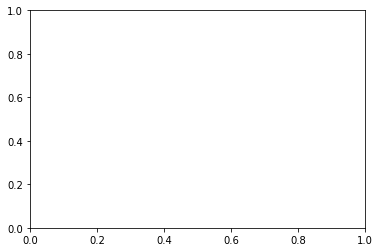

In [186]:
plt.scatter(arrLon, arrLat, c=timeAvg, s=15, edgecolors='none')
plt.colorbar()
plt.scatter(x+1, y, c=z_masked, s=15, edgecolors='none')
plt.colorbar()
plt.show()

In [128]:
df = pd.DataFrame(arrPrecip.sum(axis=0)).T
df.columns=arrLat.tolist()
df['LON']=arrLon.tolist()
df.head()

,25.156250000000004,25.218750000000004,25.281250000000004,25.343750000000004,25.406250000000004,25.468750000000004,25.531250000000004,25.593750000000004,25.656250000000004,25.718750000000004,...,52.34375000000001,52.40625000000001,52.46875000000001,52.53125000000001,52.59375000000001,52.65625000000001,52.71875000000001,52.78125000000001,52.84375000000001,LON
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,235.40625
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,235.46875
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,235.53125
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,235.59375
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,235.65625


In [131]:
dfX = pd.melt(df,id_vars='LON',var_name='LAT',value_name='Precip')

In [136]:
dfX.dtypes

LON       float64
LAT        object
Precip    float32
dtype: object

In [6]:
#Return the dimension size of the variable precip
[ntime,nlat,nlon] = dataset.variables['precipitation'].shape
print(ntime," time values")
print(nlat," latitude values")
print(nlon," longitude values")

192  time values
444  latitude values
922  longitude values


In [7]:
#Show the dimensions of the other variables
print("Time: ",time.shape)
print("Latitude: ",lat.shape)
print("Longitude: ",lon.shape)

Time:  (192,)
Latitude:  (444,)
Longitude:  (922,)


---
#### Extract a single value (i.e. single location-time value)
Let's pause and consider then what we have. First, the `precip` variable has 3 axes: `time`,`lat`, and `lon`, with sizes of 192, 444, and 922, respectively. And the value at a given time/geographic coordinate is the predicted rainfall at that specific time/location. We can extract a specific precipitation value by specifying a `time`, `lat`, and `lon` value:

In [8]:
print(precip[0,250,300])

37.11904


The interpolated precipitation at that time/location is `37 mm`. 

<u>But what time and location did we actually specify??</u> *What is time=0?? Likewise, a latitude of "250" and a longitude of "300" are not really geographic coordinates.* 

These values are actually pointers to the **positions** in the precipitation array, that is, the 1st time slice, the 251st "latitude" column, and the 301st "longitude" column - if you think of our precipitation array as a stack of lat/long tables, with a layer for each time. (Also note that Python indices are zero-based, meaning the values start at zero, not 1.)

**So how, then, do we extract data for a known time and/or location?** Well, those data are contained in the other arrays, with positions corresponding to the axes in the precipitation array:

In [9]:
print(time[0])
print(lat[250])
print(lon[300])

32864.0
40.78125
254.15625


So, we see that the precipitation value extracted above is associated with the location (`40.71824°N`,`254.15625°W`) and the time "`32864`"??!?

That time value is actually days since 01-01-1990 (found in the datasets metadata):

In [10]:
time.units

'days since 1900-01-01 00:00:00'

And we have tools to conver this into a more readable format:

In [11]:
#Create a new array, converting days since 1900 to a date time value
time2 = netCDF4.num2date(time[:],time.units)
time2[0]

datetime.datetime(1989, 12, 24, 0, 0)

And we see the first time slice is Dec 12, 1989. 

So now what we have to do is somehow link the *values* in the `time2`, `lat`, and `lon` arrays with the *axes* in the precipitation array. In doing so, we can more easily extract values we want and run various analyses on the data. 

## NumPY

The process to do this involves converting each of our NetCDF variabls into numeric arrays which then allows us to use Python's **NumPy** package to do exactly what we need to do...

In [12]:
#Import the numpy package, calling it "np" to save typing
import numpy as np

In [49]:
#Convert the NetCDF variables to arrays 
arrPrecip = precip[:]
arrLat = lat[:]
arrLon = lon[:]
arrTime = time2[:].astype(np.datetime64)

In [14]:
#Show the type of object created
type(arrPrecip)

numpy.ma.core.MaskedArray

The netCDF variables were converted to Numpy *masked arrays*. This means that, in addition to the N-dimensional numeric array, we have an associated n-dimensional array, but one with boolean values that indicate whether the data should be used in calculations or not.  

In [15]:
#Show the shape of the precip array
precip.shape

(192, 444, 922)

In [62]:
dataset.variables["Levels"][:]

KeyError: 'Levels'

#### Time series

In [78]:
latX = 250
lonX = 300
ts = precip[:,latX,lonX]
ts2 = pd.Series(ts,index=time2)

In [68]:
import matplotlib.pyplot as plt

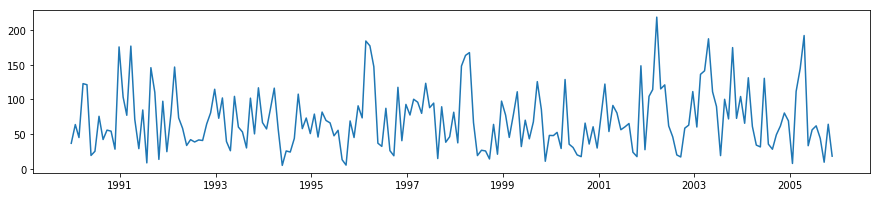

In [79]:
fig = plt.figure(figsize=(15,3))
plt.plot(ts2)

In [88]:
df = pd.DataFrame(precip,index=[time2,lat,lon])

ValueError: DataFrame constructor not properly called!

In [87]:
precip.shape,arrTime.shape,arrLat.shape,lon.shape

((192, 444, 922), (192,), (444,), (922,))

ValueError: Must pass 2-d input

#### Map for one time slice

## Pandas

In [48]:
import pandas as pd

In [50]:
df = pd.Panel(precip[:],major_axis=arrLat,minor_axis=arrLon).to_frame() 

/opt/conda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2961: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df.head()

In [ ]:
l[0],l[1]

In [ ]:
latVals = lat[:].tolist()
lonVals = lon[:].tolist()

In [ ]:
df.index = df.index.set_levels((latVals,lonVals))
df

In [ ]:
df2 = df.reset_index()
df2.rename()

# X-Array
http://xarray.pydata.org/en/stable/generated/xarray.DataArray.html
https://scottwales.github.io/swc-climatedata/02-xarray/

In [ ]:
import xarray as xr

In [ ]:
xdf = xr.DataArray(precip[:])

In [ ]:
xnc = xr.open_dataset(fileName)

In [ ]:
xp = xnc.variables['precipitation']
xp.shape

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
ds.

In [ ]:
xnc.coords['lat']

# Plotting
With our data as numpy arrays we can now plot, using the Python `matplotlib` package.

Info on colors, etc can be found here:<br>https://matplotlib.org/examples/color/colormaps_reference.html

In [187]:
#Import the plotting components
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

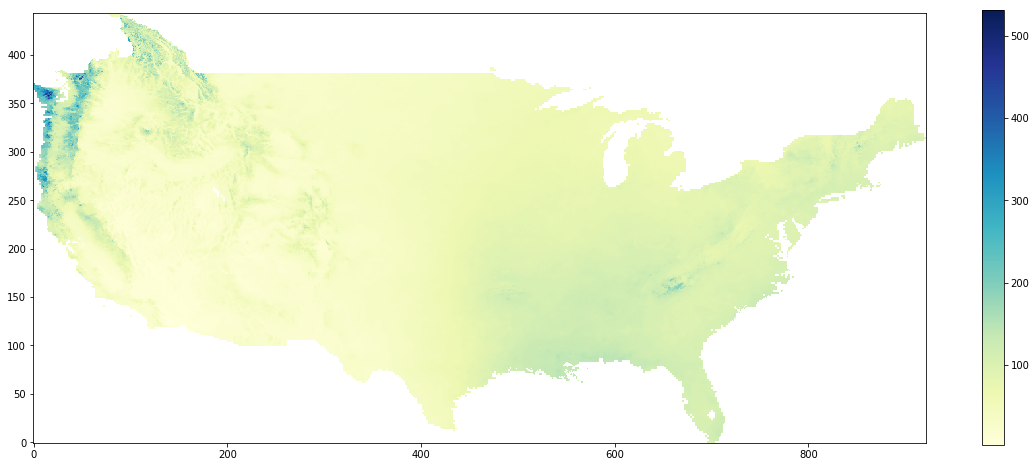

In [202]:
#Plot a map for a selected time slice
plt.figure(figsize=(20,8))
plt.imshow(timeAvg,origin=(0,0),cmap="YlGnBu")
plt.colorbar();

In [232]:
#Plot a map for a selected geographic slice
minLat = 36; maxLat = 56
minLon = 220; maxLon = 260
latMask = (arrLat > minLat) & (arrLat < maxLat)
lonMask = (arrLon > minLon) & (arrLon < maxLon)

In [233]:
dfGeog = precip[:,latMask,lonMask].mean(axis=0)
dfGeog.shape

(270, 394)

In [234]:
xTcs = arrLon[lonMask].data
yTcs = arrLat[latMask].data


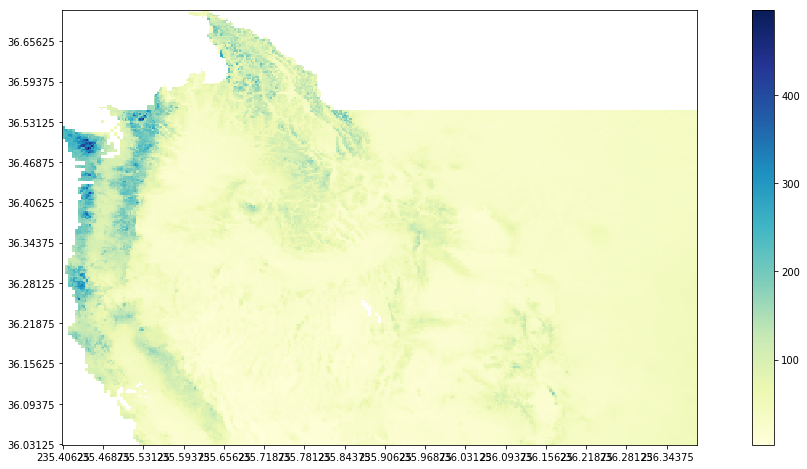

In [235]:
plt.figure(figsize=(20,8))
plt.imshow(dfGeog,origin=(0,0),cmap="YlGnBu")
plt.xticks(np.arange(xTcs.size,step=25),xTcs)
plt.yticks(np.arange(yTcs.size,step=25),yTcs)
plt.colorbar();

Now, let's move on to making our own masks. Here

In [ ]:
#Display the bounds of each axis
print("Lat:",arrLat.min(),arrLat.max())
print("Lon:",arrLon.min(),arrLon.max())
print("Time:",arrTime.min(),arrTime.max())

In [ ]:
#Meshgrid
mlon,mlat = np.meshgrid(arrLon,arrLat)

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.contourf(mlon,mlat,precip[1,:,:],linestyles='none')
plt.colorbar();
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.subplot(2,1,2)
plt.contourf(mlon,mlat,precip[1,:,:],linestyles='none')
plt.colorbar();
plt.xlabel('Longitude')
plt.ylabel('Latitude');


In [ ]:
arrLat.shape,arrLon.shape,precip.shape

In [ ]:
#Lat/lon slices
latMask = (arrLat>30) & (arrLat<31)
lonMask = (arrLon>230) & (arrLon<231)

In [ ]:
#Lat/lon slices
latMask = (mlat>30) & (mlat<31)
lonMask = (mlon>230) & (mlon<231)
latMask.shape,lonMask.shape

In [ ]:
arrPrecip

# Calculate summer (JJA) average
Reduce the 3 dimensional precip data to two dimension by averaging over time

In [ ]:
avgPrecip = arrPrecip.mean(axis=0)

In [ ]:
tSlice = arrPrecip[arrTime >= np.datetime64('1999'),:,:]
tSlice.shape

In [ ]:
nyear = int(ntime/12)
year = np.arange(1995,2006)
precip_JJA = np.zeros((nyear,nlon,nlat))

In [ ]:
arrTime.astype(np.datetime64[Y])

In [ ]:
year = 1997
yearMask = arrPrecip[arrTime == np.datetime64(str(year)),:,:]
yearMask.shape

In [ ]:
for ii in year:
    #Create the mask
    precip_JJA(ii,:,:) = arrPrecip

In [ ]:
foo = np.broadcast_to(1,arrLat)

In [ ]:
#Lat/lon slices
latMask = (arrLat>30) & (arrLat<31)
lonMask = (arrLon>230) & (arrLon<231)
latMask.shape,lonMask.shape

In [ ]:
foo = np.ma.masked_where(latMask>30,arrPrecip)
foo.shape

In [ ]:
bigMask = np.ma.mask_or(latMask,lonMask,arrPrecip.mask)

In [ ]:
foo = np.broadcast_to(bigMask,arrPrecip.shape)

In [ ]:
#Plot a map for a selected time slice
plt.figure(figsize=(20,8))
plt.imshow(foo[0,:,:],origin=(0,0),cmap="YlGnBu")
plt.colorbar();

In [ ]:
latMask = (latMesh>30) & (latMesh<34)
lonMask = (lonMesh>230) & (lonMesh<235)

In [ ]:
#https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html
precipX = arrPrecip[0,latMask,lonMask]

In [ ]:
arrTime.astype('datetime64[M]')

In [ ]:
arrTime[arrTime<np.datetime64(1995)]

In [ ]:
time2 == np.datetime64('1995')

In [ ]:
pPanel = pd.Panel(rollaxis(a,0)).to_frame()

In [ ]:
#Create mesh grids 
xx,yy = np.meshgrid(lon[:],lat[:])

In [ ]:
xx.shape, yy.shape

In [ ]:
xMask= 

---
---
---

In [ ]:
# return the attribute of the variable precip
units = precip.units
print(units)

---
Because Python has much broader uses than MatLab, we need to use a specific package to handle data arrays. This package is called `NumPy`

In [ ]:
# Import the numpy package
import numpy as np

In [ ]:
# convert variables to NumPy arrays
arrLon = lon[:]
arrLat = lat[:]
arrTime = time[:]
arrPrecip = precip[:]

The `[:]` extracts the values in each netCDF variable into a "masked array". A *masked* array only different from a standard array in that it includes a corresponding Boolean array that indicates which cells have values. 

In [ ]:
# Show the data type of the arrPrecip
type(arrPrecip)

In [ ]:
#Show the shape of the array
arrPrecip.mask.shape

In [ ]:
arrPrecip.size, arrPrecip.mask.size

...back to our MatLab analog, but now working with the arrPrecip numpy array in place of the NetCDF variable

In [ ]:
# replace fillvalues with nan(not a number)
##-->We don't have to do this as the arrays are masked already!##
print("Min of masked data = ",arrPrecip[arrPrecip.mask == False].min())
print("Min of all data =",arrPrecip.data.min())

In [ ]:
# calculate summer(JJA) average
nyear = int(ntime / 12)
year = np.arange(1990,2006)
precip_JJA = np.zeros((nlon,nlat,nyear))
for ii in year:
    startTime = 6+12*(ii-1)
    endTime = 8+12*(ii-1)
    #precip_JJA(ii,:,:) = precip()
    arrPrecip(6+12*(ii-1):8+12*(ii-1)),:,:)

In [ ]:
year = 1995
startTime = 6+12*(year-1)
endTime = 8+12*(year-1)
arrPrecip[startTime:endTime,:,:].mean()

In [ ]:
arrPrecip.shape

In [ ]:
arrPrecip[:,250,500].data
